In [1]:

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('pisa_data_clean.csv')

C:\Users\kids1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Unnamed: 0,country,studentId,internationalGrade,birthMonth,birthYear,gender,notGoodMaths,payAttentionInClassesMath,talkAboutMaths,...,BirthCountry,Wealth,AppliedMathinSchool,PureMathinSchool,AverageMathScore,AverageReadingScore,AverageScienceScore,Max Math Score,Max Reading Score,Max Science Score
0,1,Albania,1,10,2,1996,Female,Disagree,Agree,Often,...,Albania,-2.92,NaN,NaN,366.18634,261.01424,371.91348,406.8469,406.8496,408.8400
1,2,Albania,2,10,2,1996,Female,NaN,Agree,Sometimes,...,Albania,0.69,-0.0681,0.7955,470.56396,384.68832,478.12382,486.1427,406.2936,548.9929
2,3,Albania,3,9,9,1996,Female,NaN,Agree,Sometimes,...,Albania,-0.23,0.5359,0.7955,505.53824,405.18154,486.60946,533.2684,431.3938,512.7191
3,4,Albania,4,9,8,1996,Female,Strongly agree,NaN,NaN,...,Albania,-1.17,0.3220,0.7955,449.45476,477.46376,453.97240,498.6836,547.3630,481.5740
4,5,Albania,5,9,10,1996,Female,Strongly agree,Agree,Always or almost always,...,Albania,-1.17,NaN,NaN,385.50398,256.01010,367.15778,418.5309,311.7707,422.1746


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 42 columns):
Unnamed: 0                      485490 non-null int64
country                         485490 non-null object
studentId                       485490 non-null int64
internationalGrade              485490 non-null int64
birthMonth                      485490 non-null int64
birthYear                       485490 non-null int64
gender                          485490 non-null object
notGoodMaths                    313502 non-null object
payAttentionInClassesMath       312900 non-null object
talkAboutMaths                  313495 non-null object
helpFriendsMaths                313025 non-null object
extracurricularActivity         312168 non-null object
participateInCompetitions       312378 non-null object
studyMoreThan2ExtraHoursADay    312582 non-null object
playChess                       312571 non-null object
computerProgramming             312425 non-null object
participateInM

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'studentId', 'internationalGrade',
       'birthMonth', 'birthYear', 'gender', 'notGoodMaths',
       'payAttentionInClassesMath', 'talkAboutMaths', 'helpFriendsMaths',
       'extracurricularActivity', 'participateInCompetitions',
       'studyMoreThan2ExtraHoursADay', 'playChess', 'computerProgramming',
       'participateInMathClub', 'Motherschooling', 'Motherathome',
       'MotherQualifications6', 'MotherQualifications5a',
       'MotherQualifications5b', 'MotherQualifications4', 'BadExplain',
       'Notinterested', 'helpfulteacher', 'motivatingteacher', 'openteacher',
       'TeacherStudentRelations', 'TeacherBehavior', 'BirthCountryFather',
       'BirthCountryMother', 'BirthCountry', 'Wealth', 'AppliedMathinSchool',
       'PureMathinSchool', 'AverageMathScore', 'AverageReadingScore',
       'AverageScienceScore', 'Max Math Score', 'Max Reading Score',
       'Max Science Score'],
      dtype='object')

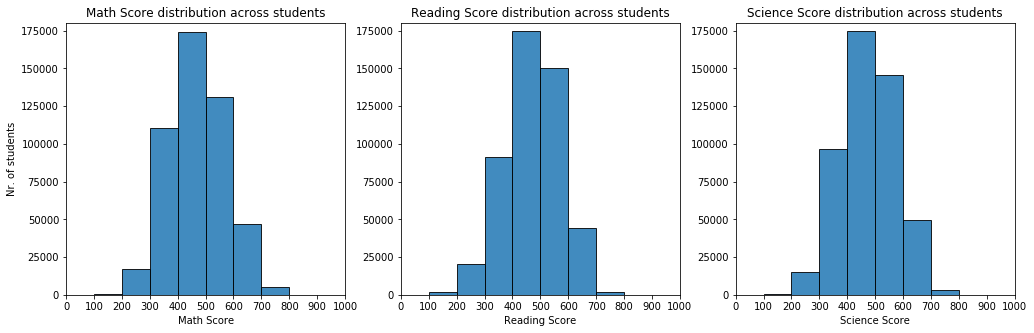

In [5]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df['AverageMathScore'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Nr. of students')
plt.title("Math Score distribution across students");

plt.subplot(1, 3, 2)
plt.hist(df['AverageReadingScore'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading Score distribution across students");

plt.subplot(1, 3, 3)
plt.hist(df['AverageScienceScore'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.title("Science Score distribution across students");

We can find normal distribution 

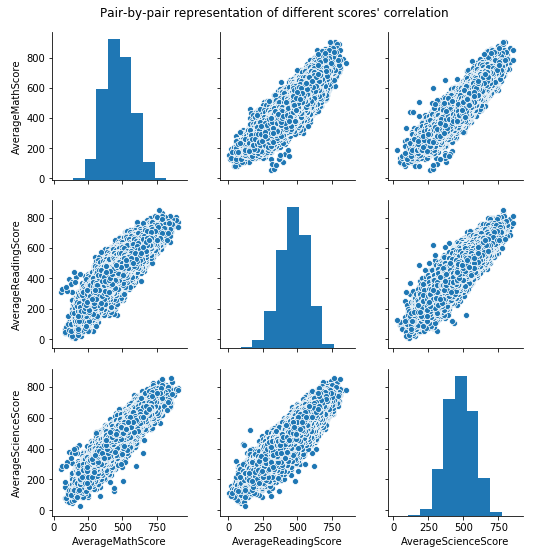

In [6]:
grid = sns.pairplot(data = df, vars=["AverageMathScore", "AverageReadingScore", "AverageScienceScore"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

We can find there are strong positive relationship between these three score.

In [7]:
df_country_gender = df.groupby(["country", "gender"]).mean()

In [8]:
df_country_gender.reset_index(inplace= True)

In [9]:
df_country_gender.head()

,country,gender,Unnamed: 0,studentId,internationalGrade,birthMonth,birthYear,TeacherStudentRelations,TeacherBehavior,Wealth,AppliedMathinSchool,PureMathinSchool,AverageMathScore,AverageReadingScore,AverageScienceScore,Max Math Score,Max Reading Score,Max Science Score
0,Albania,Female,2358.932119,2358.932119,9.653974,6.281871,1996.000000,0.729796,0.697168,-1.210594,0.218127,0.145877,395.158284,403.324355,401.725597,433.282763,459.233812,447.733761
1,Albania,Male,2385.567684,2385.567684,9.541470,6.244951,1996.000000,0.712700,0.697113,-1.204118,0.194762,0.137522,394.588855,388.905574,396.000024,433.612587,445.674763,441.763419
2,Argentina,Female,19216.177000,2973.177000,9.690973,6.438484,1996.446836,0.090194,-0.075947,-0.870039,-0.260363,-0.114936,389.281707,420.902286,412.925575,419.236247,460.958130,448.812472
3,Argentina,Male,19176.698032,2933.698032,9.484794,6.320215,1996.453309,0.147919,0.178862,-0.823989,-0.061496,-0.306884,402.712639,384.320825,407.752807,431.828126,424.599924,443.698317
4,Australia,Female,29399.999152,7248.999152,10.110813,6.539929,1996.335972,0.146254,0.036807,0.442441,-0.184436,-0.167417,487.280269,518.495145,509.375266,515.462351,549.263744,542.068884


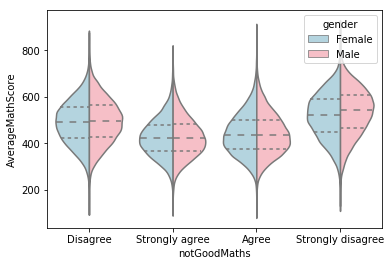

In [10]:

with sns.axes_style(style=None):
    sns.violinplot("notGoodMaths", "AverageMathScore", hue="gender", data=df,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

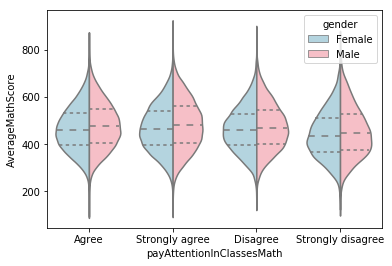

In [11]:
with sns.axes_style(style=None):
    sns.violinplot("payAttentionInClassesMath", "AverageMathScore", hue="gender", data=df,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

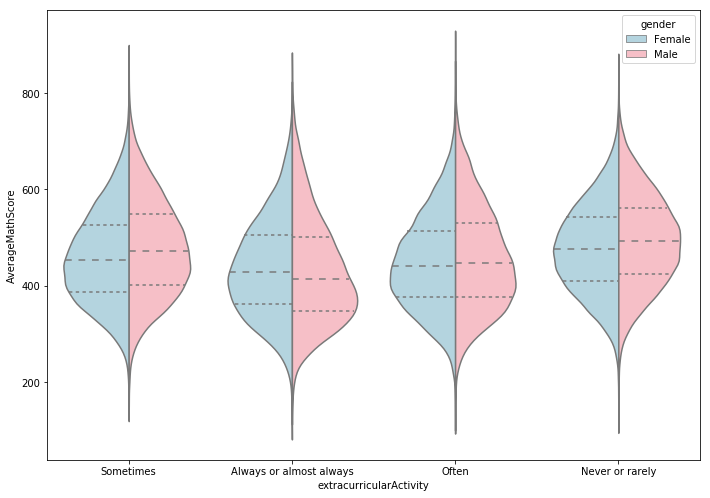

In [12]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot("extracurricularActivity", "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [13]:
import matplotlib
matplotlib.use('TkAgg')

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\kids1\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\kids1\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\kids1\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\U

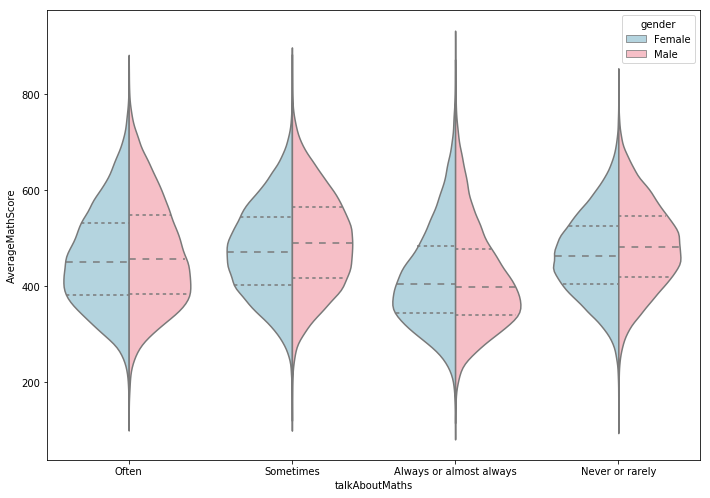

In [14]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('talkAboutMaths', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);


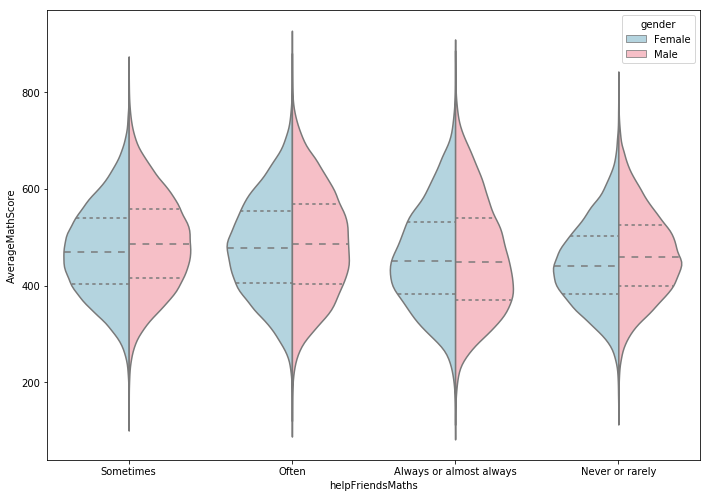

In [15]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('helpFriendsMaths', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

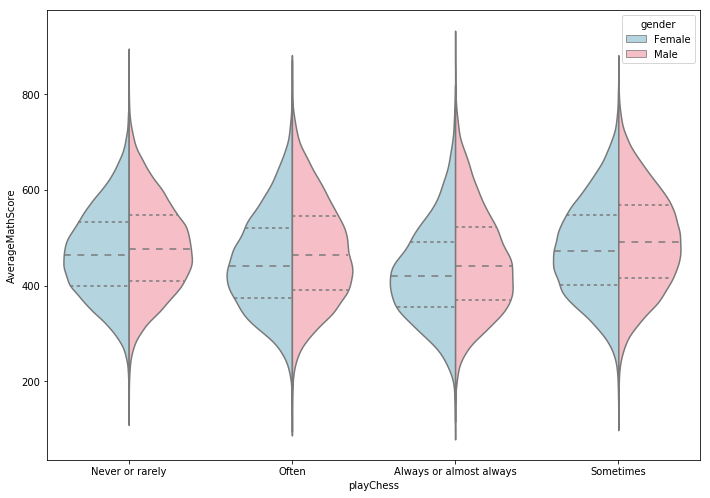

In [16]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('playChess', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

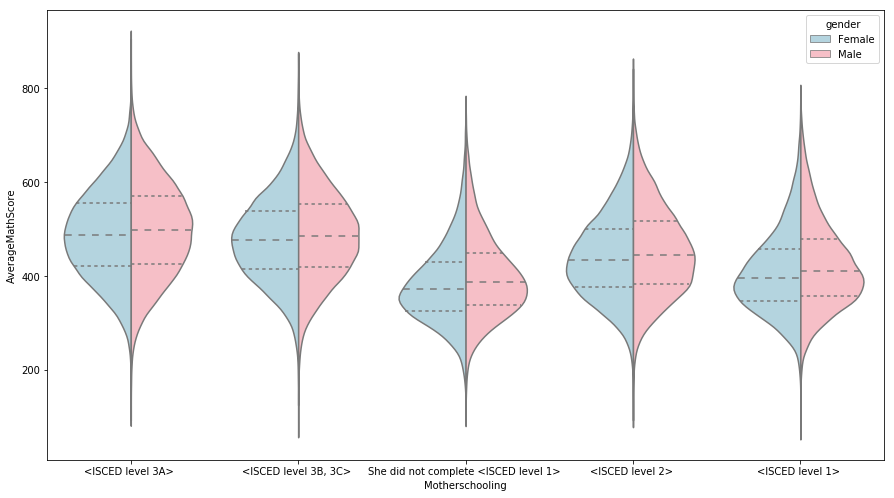

In [17]:
a5_dims = (15, 8.27)

fig, ax = plt.subplots(figsize=a5_dims)

with sns.axes_style(style=None):
    sns.violinplot('Motherschooling', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

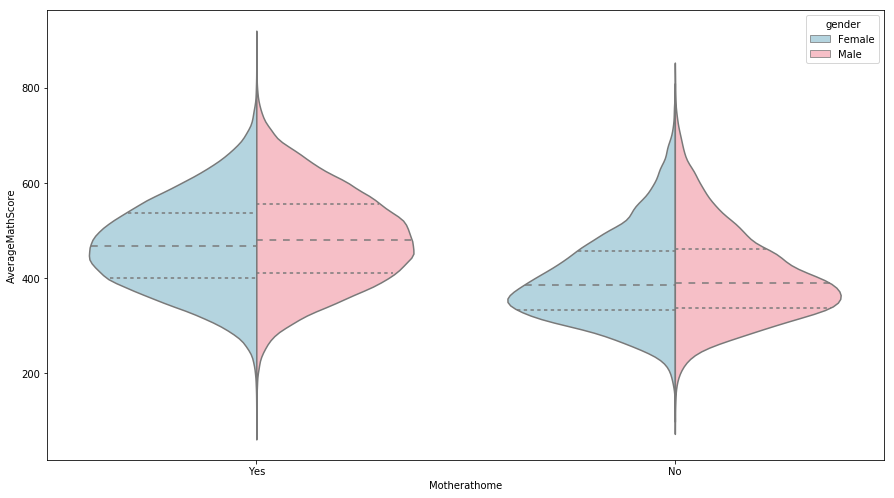

In [18]:
fig, ax = plt.subplots(figsize=a5_dims)

with sns.axes_style(style=None):
    sns.violinplot('Motherathome', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

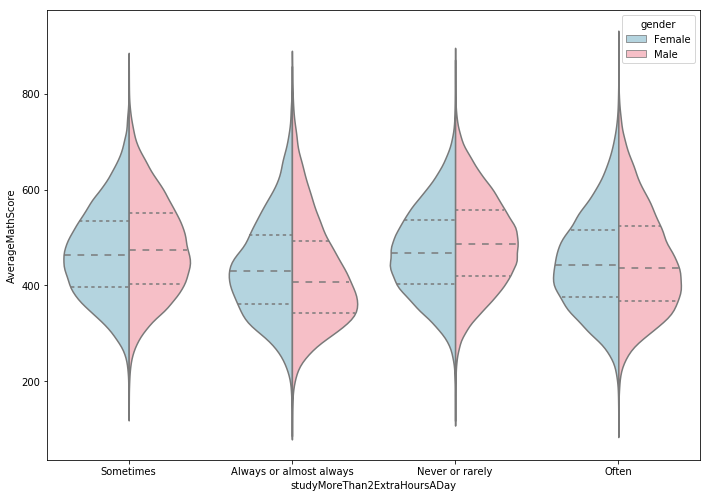

In [19]:

fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('studyMoreThan2ExtraHoursADay', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

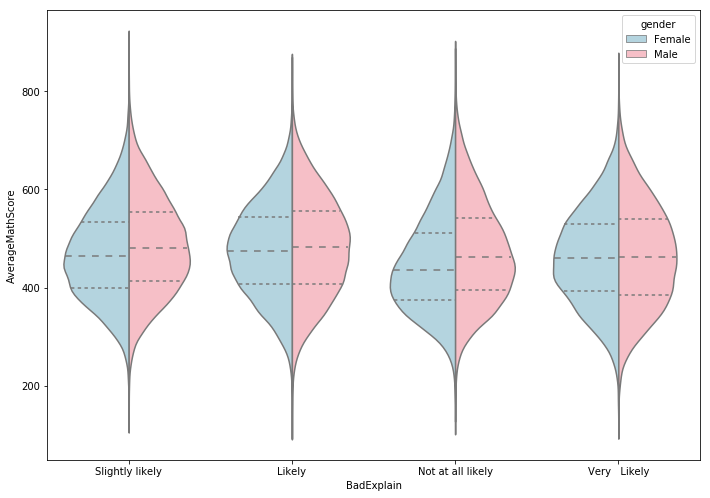

In [20]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('BadExplain', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

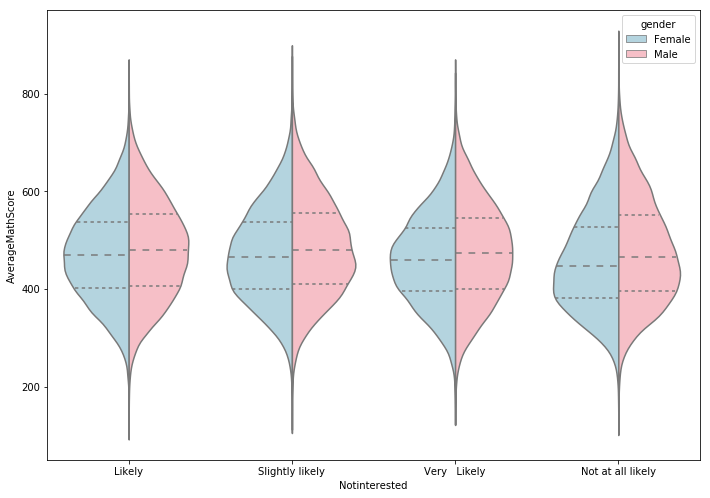

In [21]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('Notinterested', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

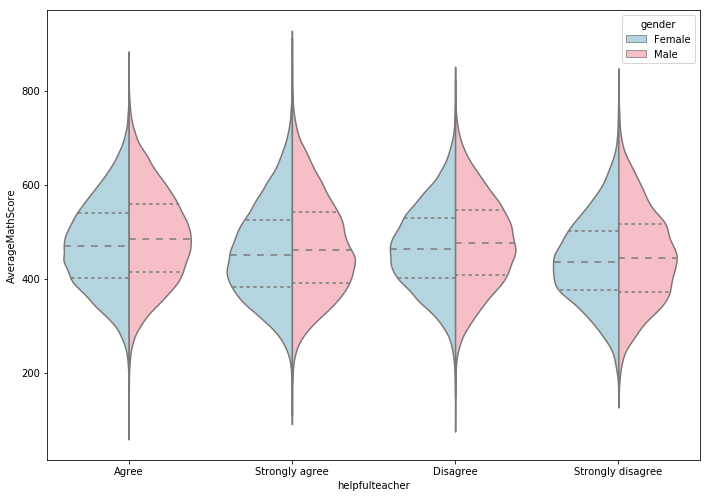

In [22]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('helpfulteacher', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

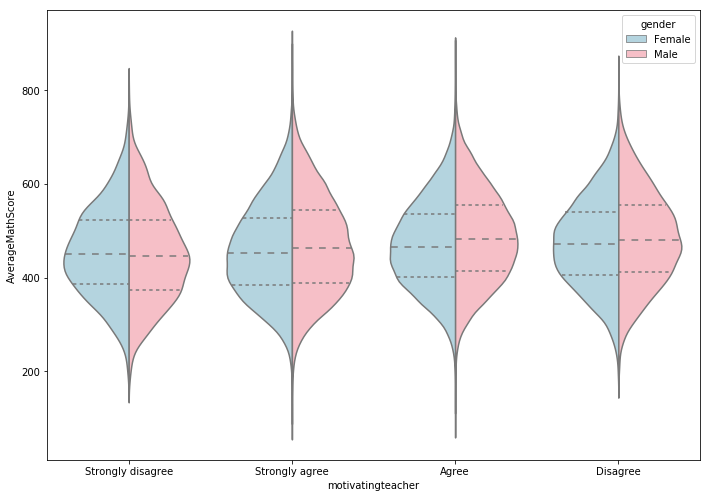

In [23]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('motivatingteacher', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

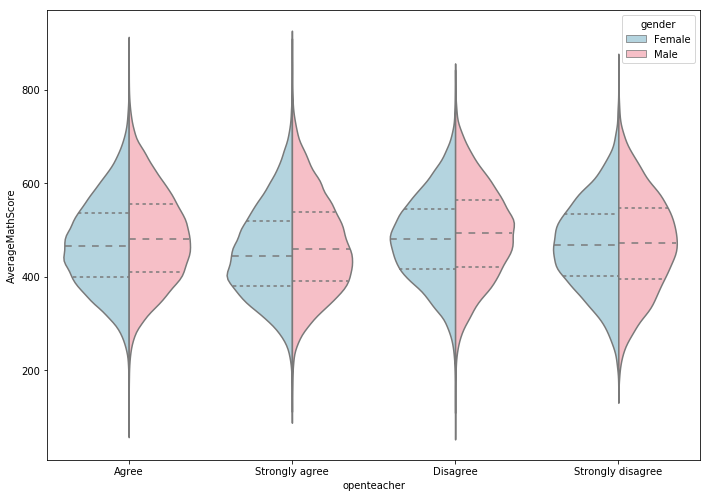

In [24]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('openteacher', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


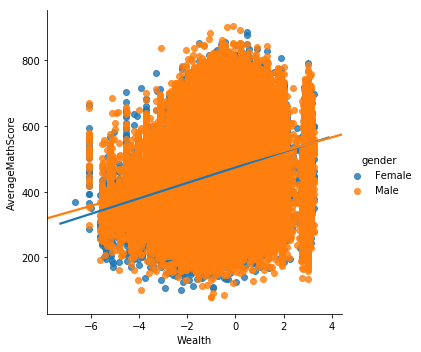

In [25]:
ax = sns.lmplot(x="Wealth", y="AverageMathScore", hue="gender",
                   data=df)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


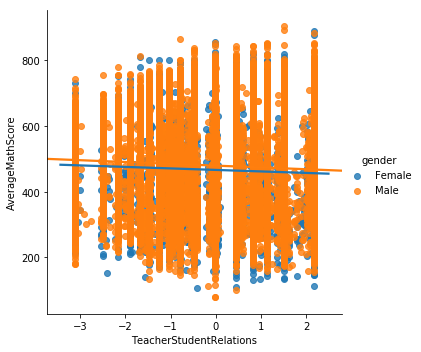

In [26]:
ax = sns.lmplot(x="TeacherStudentRelations", y="AverageMathScore", hue="gender",
                   data=df)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


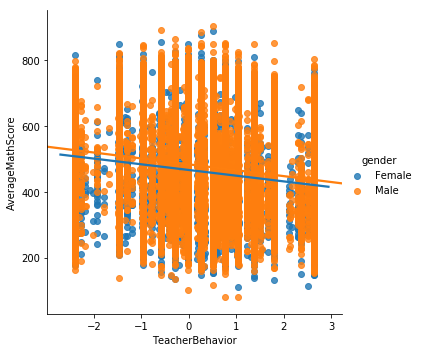

In [27]:
ax = sns.lmplot(x="TeacherBehavior", y="AverageMathScore", hue="gender",
                   data=df)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


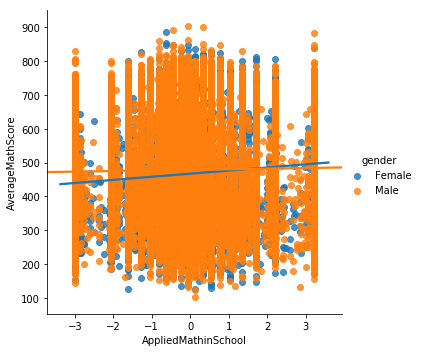

In [28]:

ax = sns.lmplot(x="AppliedMathinSchool", y="AverageMathScore", hue="gender",
                   data=df)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


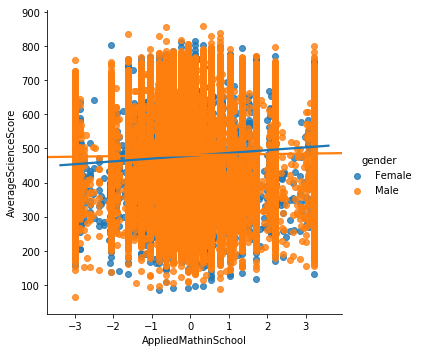

In [29]:
ax = sns.lmplot(x="AppliedMathinSchool", y="AverageScienceScore", hue="gender",
                   data=df)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


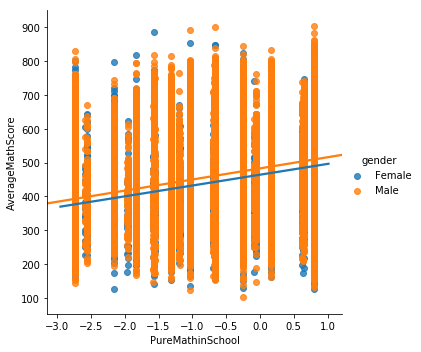

In [30]:
ax = sns.lmplot(x='PureMathinSchool', y="AverageMathScore", hue="gender",
                   data=df)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


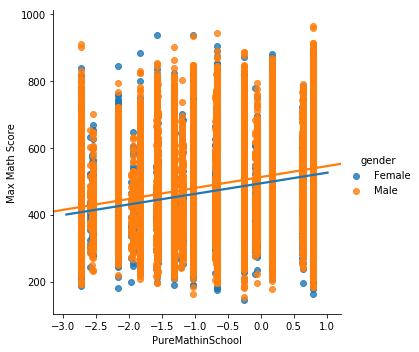

In [31]:

ax = sns.lmplot(x='PureMathinSchool', y='Max Math Score', hue="gender",
                   data=df)

In [32]:
df.country.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

In [33]:
df_us = df[df.country == "United States of America"]


C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


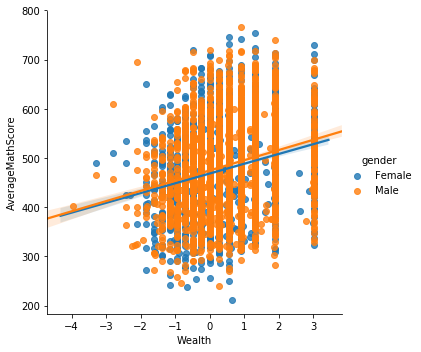

In [34]:

ax = sns.lmplot(x="Wealth", y="AverageMathScore", hue="gender",
                   data=df_us)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


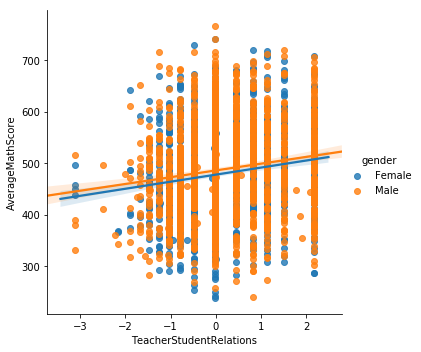

In [35]:
ax = sns.lmplot(x="TeacherStudentRelations", y="AverageMathScore", hue="gender",
                   data=df_us)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


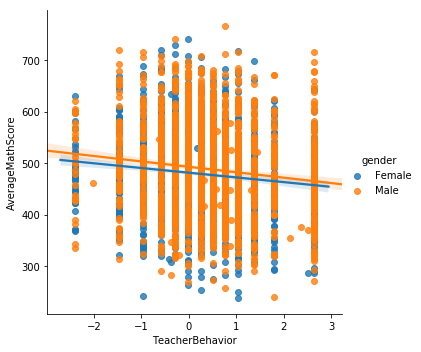

In [36]:
ax = sns.lmplot(x="TeacherBehavior", y="AverageMathScore", hue="gender",
                   data=df_us)

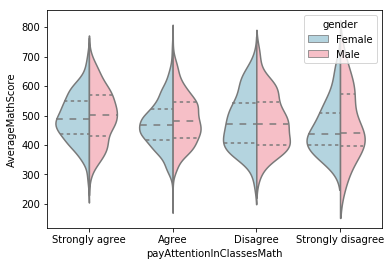

In [37]:
with sns.axes_style(style=None):
    sns.violinplot("payAttentionInClassesMath", "AverageMathScore", hue="gender", data=df_us,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

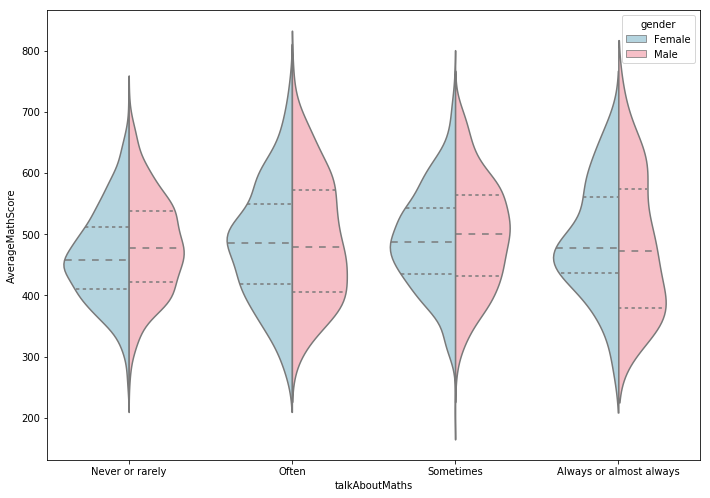

In [38]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('talkAboutMaths', "AverageMathScore", hue="gender", data=df_us, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

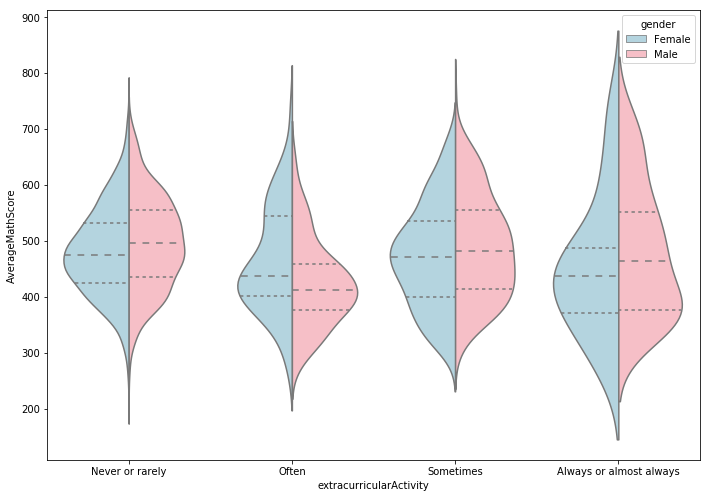

In [39]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot("extracurricularActivity", "AverageMathScore", hue="gender", data=df_us, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

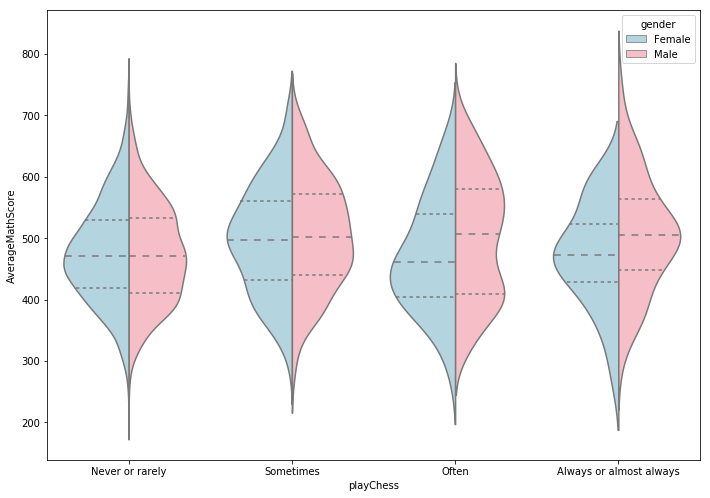

In [40]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('playChess', "AverageMathScore", hue="gender", data=df_us, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

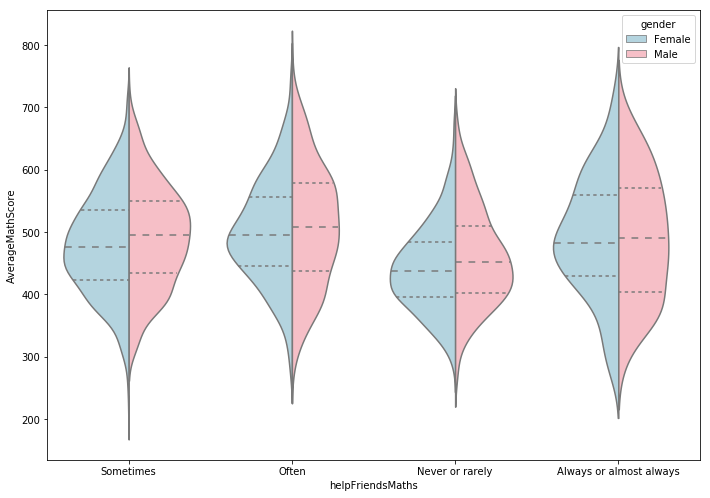

In [41]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('helpFriendsMaths', "AverageMathScore", hue="gender", data=df_us, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

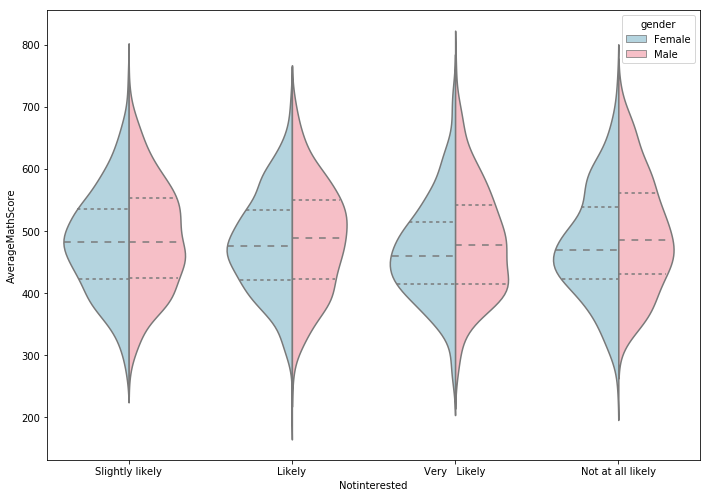

In [42]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('Notinterested', "AverageMathScore", hue="gender", data=df_us, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

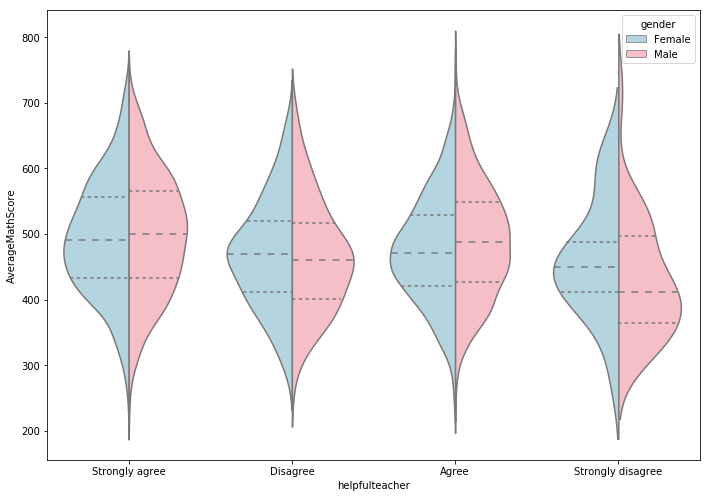

In [43]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('helpfulteacher', "AverageMathScore", hue="gender", data=df_us, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

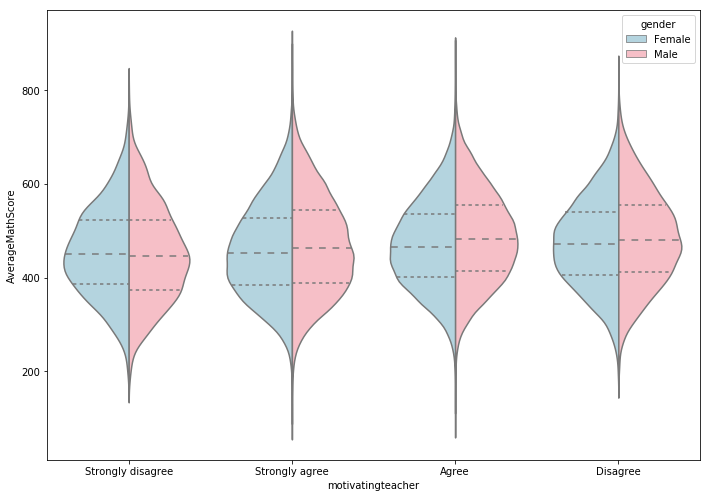

In [44]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('motivatingteacher', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

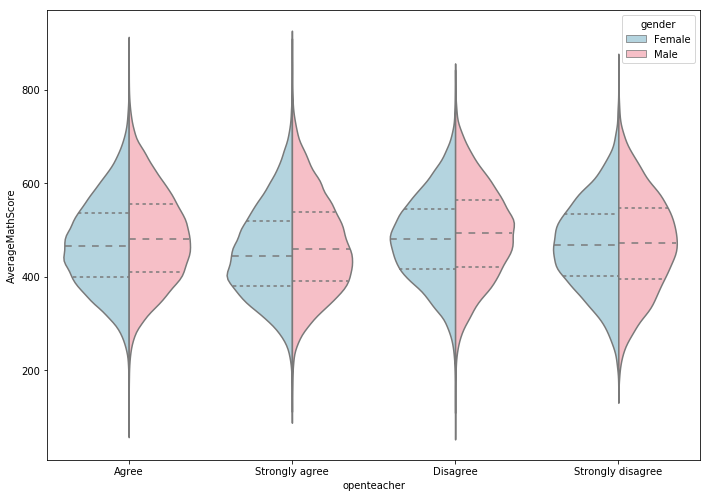

In [45]:
fig, ax = plt.subplots(figsize=a4_dims)

with sns.axes_style(style=None):
    sns.violinplot('openteacher', "AverageMathScore", hue="gender", data=df, ax=ax,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [46]:
1 +1

2

# Building Statistic Model

In [47]:
import statsmodels.api as sm;


In [50]:
df_us.columns

Index(['Unnamed: 0', 'country', 'studentId', 'internationalGrade',
       'birthMonth', 'birthYear', 'gender', 'notGoodMaths',
       'payAttentionInClassesMath', 'talkAboutMaths', 'helpFriendsMaths',
       'extracurricularActivity', 'participateInCompetitions',
       'studyMoreThan2ExtraHoursADay', 'playChess', 'computerProgramming',
       'participateInMathClub', 'Motherschooling', 'Motherathome',
       'MotherQualifications6', 'MotherQualifications5a',
       'MotherQualifications5b', 'MotherQualifications4', 'BadExplain',
       'Notinterested', 'helpfulteacher', 'motivatingteacher', 'openteacher',
       'TeacherStudentRelations', 'TeacherBehavior', 'BirthCountryFather',
       'BirthCountryMother', 'BirthCountry', 'Wealth', 'AppliedMathinSchool',
       'PureMathinSchool', 'AverageMathScore', 'AverageReadingScore',
       'AverageScienceScore', 'Max Math Score', 'Max Reading Score',
       'Max Science Score'],
      dtype='object')

In [51]:
df_us.head()

,Unnamed: 0,country,studentId,internationalGrade,birthMonth,birthYear,gender,notGoodMaths,payAttentionInClassesMath,talkAboutMaths,...,BirthCountry,Wealth,AppliedMathinSchool,PureMathinSchool,AverageMathScore,AverageReadingScore,AverageScienceScore,Max Math Score,Max Reading Score,Max Science Score
475553,475554,United States of America,1,10,1,1997,Female,NaN,Strongly agree,Never or rarely,...,United States of America,0.27,-0.0681,0.7955,364.70634,425.27756,332.28270,399.7585,479.9261,354.1029
475554,475555,United States of America,2,10,11,1996,Male,Disagree,Strongly agree,Never or rarely,...,United States of America,0.27,NaN,NaN,412.92256,442.73560,423.66652,422.2698,471.7660,438.9593
475555,475556,United States of America,3,9,4,1997,Male,NaN,Agree,Often,...,United States of America,-1.38,-0.0681,-0.2503,402.71850,438.24474,418.44460,424.0614,470.4829,440.0783
475556,475557,United States of America,4,11,9,1996,Female,Strongly agree,NaN,NaN,...,United States of America,1.33,-0.8234,0.7955,490.27108,502.80226,468.70572,512.8603,532.9860,503.2078
475557,475558,United States of America,5,10,3,1997,Male,Agree,Agree,Often,...,United States of America,-0.64,NaN,NaN,321.63108,307.68808,288.26932,352.1654,326.6140,334.5207


In [60]:
pd.get_dummies(df_us['Motherschooling'])

,<ISCED level 1>,<ISCED level 2>,<ISCED level 3A>,She did not complete <ISCED level 1>
475553,0,0,1,0
475554,0,0,1,0
475555,1,0,0,0
475556,0,0,1,0
475557,0,0,1,0
475558,0,0,1,0
475559,0,0,1,0
475560,0,0,0,0
475561,0,0,1,0
475562,0,0,0,0


In [74]:
df_model = pd.DataFrame()
df_model[['Wealth','AppliedMathinSchool',"TeacherStudentRelations",'PureMathinSchool','AverageMathScore']] = df_us[['Wealth','AppliedMathinSchool',"TeacherStudentRelations",'PureMathinSchool','AverageMathScore']]
df_model[['female', 'male']]= pd.get_dummies(df_us["gender"])
df_model[["helpfulteacher_Agree","helpfulteacher_Disagree","helpfulteacher_Strongly_agree","helpfulteacher_Strongly_disagree"]] = pd.get_dummies(df_us["helpfulteacher"])
df_model[['level 1','level 2','level 3A','Shedidnotcomplete<ISCED_level_1>']] = pd.get_dummies(df_us['Motherschooling'])

In [75]:
df_model['intercept'] = 1

In [76]:
df_model.head()

,Wealth,AppliedMathinSchool,TeacherStudentRelations,PureMathinSchool,AverageMathScore,female,male,helpfulteacher_Agree,helpfulteacher_Disagree,helpfulteacher_Strongly_agree,helpfulteacher_Strongly_disagree,level 1,level 2,level 3A,Shedidnotcomplete<ISCED_level_1>,intercept
475553,0.27,-0.0681,NaN,0.7955,364.70634,1,0,0,0,0,0,0,0,1,0,1
475554,0.27,NaN,1.13,NaN,412.92256,0,1,0,0,1,0,0,0,1,0,1
475555,-1.38,-0.0681,NaN,-0.2503,402.71850,0,1,0,0,0,0,1,0,0,0,1
475556,1.33,-0.8234,-1.47,0.7955,490.27108,1,0,0,1,0,0,0,0,1,0,1
475557,-0.64,NaN,-0.02,NaN,321.63108,0,1,1,0,0,0,0,0,1,0,1


In [77]:
df_model_1 = df_model.drop(['female', 'helpfulteacher_Strongly_disagree','Shedidnotcomplete<ISCED_level_1>'], axis = 1)

In [78]:
df_model_1.columns

Index(['Wealth', 'AppliedMathinSchool', 'TeacherStudentRelations',
       'PureMathinSchool', 'AverageMathScore', 'male', 'helpfulteacher_Agree',
       'helpfulteacher_Disagree', 'helpfulteacher_Strongly_agree', 'level 1',
       'level 2', 'level 3A', 'intercept'],
      dtype='object')

In [81]:
df_model_1 = df_model_1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


In [82]:
df_model_1.head()

,Wealth,AppliedMathinSchool,TeacherStudentRelations,PureMathinSchool,AverageMathScore,male,helpfulteacher_Agree,helpfulteacher_Disagree,helpfulteacher_Strongly_agree,level 1,level 2,level 3A,intercept
475556,1.33,-0.8234,-1.47,0.7955,490.27108,0,0,1,0,0,0,1,1
475559,-0.48,-0.2531,-0.79,-0.2503,378.41564,1,1,0,0,0,0,1,1
475562,0.57,-1.0408,-1.04,0.7955,388.07446,1,1,0,0,0,0,0,1
475563,0.01,0.1222,-1.68,0.7955,458.10094,1,0,1,0,0,0,1,1
475565,0.01,1.0301,-1.04,0.1674,470.79762,0,1,0,0,0,0,1,1


In [83]:
lm = sm.OLS(df_model_1['AverageMathScore'], df_model_1[['Wealth', 'AppliedMathinSchool', 'TeacherStudentRelations', 'PureMathinSchool', 'male', 'helpfulteacher_Agree','helpfulteacher_Disagree', 'helpfulteacher_Strongly_agree','level 1',
       'level 2', 'level 3A', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       AverageMathScore   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     27.23
Date:                Tue, 07 May 2019   Prob (F-statistic):           1.83e-52
Time:                        16:50:47   Log-Likelihood:                -9096.4
No. Observations:                1569   AIC:                         1.822e+04
Df Residuals:                    1557   BIC:                         1.828e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Wealth                           13.6963      2.062      6.642      0.000       9.651      17.741
AppliedMathinSchool              -1.0068      2.296     -0.438      0.661      -5.511       3.497
TeacherStudentRelations           6.1147      3.463      1.766      0.078      -0.678      12.908
PureMathinSchool                 25.3040      2.458     10.296      0.000      20.483      30.125
male                              7.8253      4.084      1.916      0.056      -0.185      15.836
helpfulteacher_Agree             38.4306     14.122      2.721      0.007      10.731      66.131
helpfulteacher_Disagree          30.9824     14.806      2.093      0.037       1.941      60.024
helpfulteacher_Strongly_agree    41.2252     16.445      2.507      0.012       8.968      73.482
level 1                          14.9852     14.628      1.024      0.306     -13.708      43.679
level 2                          -1.0985     12.408     -0.089      0.929     -25.438      23.241
level 3A                         36.1187     10.270      3.517      0.000      15.973      56.264
intercept                       398.3793     17.051     23.364      0.000     364.934     431.825
==============================================================================
Omnibus:                       12.775   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.728
Skew:                           0.167   Prob(JB):                      0.00284
Kurtosis:                       2.740   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""